In [1]:
# 运行此段做数据准备
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

srcImg = cv.imread('../images/flower.png', 0)
rows, cols = srcImg.shape

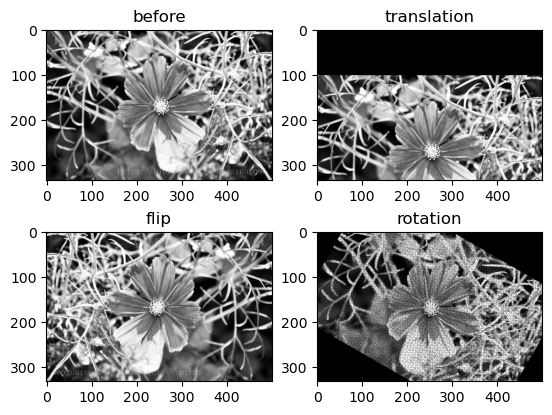

In [5]:
'''
# 原图像
'''
figure1 = plt.figure()
plt.subplot(221)
plt.title("before")
plt.imshow(srcImg, 'gray', vmin=0, vmax=255)


'''
# 平移
'''
img1 = np.zeros(srcImg.shape)
delta_x = int(100)
delta_y = int(0)
# 创建平移矩阵，delta_x，delta_y分别表示像素向下和向右移动的距离（负值表示反向移动,即x轴正方向向下，y轴正方向向右，为笛卡尔坐标系
translation_mat = np.array([[1, 0, delta_x],
                            [0, 1, delta_y],
                            [0, 0, 1]])

for index, value in np.ndenumerate(srcImg):
    index_src_mat = np.array([[index[0], index[1], 1]]).T
    index_new_mat = np.dot(translation_mat, index_src_mat)
    # 这里得到的的index_new_array是向量形式的[[x1,y1,1]]形式，无法直接作为索引
    index_new_array = index_new_mat[:][:2].T
    # 将其展平为一维向量(形式为[[a1,a2...]])，使用tolist方法转化为列表(形式为[a1,a2...]),再转化为元组；如果直接从数组转化为元组得到结果形式为（[a1,a2...]）
    index_new = tuple(index_new_array.reshape(-1).tolist())
    if (index_new[0] < rows and index_new[1] < cols):
        img1[index_new] = srcImg[index]

plt.subplot(222)
plt.title("translation")
plt.imshow(img1, 'gray', vmin=0, vmax=255)


'''
# 镜像
'''
img2 = np.zeros(srcImg.shape)
horizonal_flip = bool(True)
vertical_flip = bool(False)
if horizonal_flip == True and vertical_flip == True:
    flip_mat = np.array([[-1,  0, rows],
                         [ 0, -1, cols],
                         [ 0,  0, 1]])
elif horizonal_flip == True and vertical_flip == False:
    flip_mat = np.array([[ 1,  0, 0],
                         [ 0, -1, cols],
                         [ 0,  0, 1]])
elif horizonal_flip == False and vertical_flip == True:
    flip_mat = np.array([[-1,  0, rows],
                         [ 0,  1, 0],
                         [ 0,  0, 1]])
else:
    flip_mat = np.array([[ 1,  0, 0],
                         [ 0,  1, 0],
                         [ 0,  0, 1]])
# 重复与平移一样的操作
for index, value in np.ndenumerate(srcImg):
    index_src_mat = np.array([[index[0], index[1], 1]]).T
    index_new_mat = np.dot(flip_mat, index_src_mat)
    index_new_array = index_new_mat[:][:2].T
    index_new = tuple(index_new_array.reshape(-1).tolist())
    if (index_new[0] < rows and index_new[1] < cols):
        img2[index_new] = srcImg[index]
plt.subplot(223)
plt.title("flip")
plt.imshow(img2, 'gray', vmin=0, vmax=255)


'''
# 旋转
'''
# 该旋转操作未进行插值处理, 图片质量不佳
import math
img3 = np.zeros(srcImg.shape)
# 以旋转30度为例，正数代表顺时针旋转
angle = 30
rot_center = (rows // 2, cols // 2)
# 角度转化为弧度制
rot_angle = angle / 180 * math.pi
a = math.cos(rot_angle)
b = math.sin(rot_angle)

rot_mat = np.array([[ a, b, (1 - a) * rot_center[0] - b * rot_center[1]],
                    [-b, a, b * rot_center[0] + (1 - a) * rot_center[1]],
                    [ 0, 0, 1]])

# 重复与平移一样的操作,只是使用三角函数运算返回索引为浮点数，使用时将其转化为无符号整数
for index, value in np.ndenumerate(srcImg):
    index_src_mat = np.array([[index[0], index[1], 1]]).T
    index_new_mat = np.dot(rot_mat, index_src_mat)
    index_new_array = index_new_mat[:][:2].T.astype(np.uint)    #此处多一步转化数据类型操作
    index_new = tuple(index_new_array.reshape(-1).tolist())
    if (index_new[0] < rows and index_new[1] < cols):
        img3[index_new] = srcImg[index]
plt.subplot(224)
plt.title("rotation")
plt.imshow(img3, 'gray', vmin=0, vmax=255)


下面这段为使用opencv库函数的代码,主要使用函数为 '''cv.warpAffine()'''

输入应为2x3矩阵M,为非齐次矩阵，实际上就是略去了转移矩阵的第三行，可参考https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html
平移时，M就是上面代码中平移矩阵translation_mat的前两行

镜像时，使用'''cv.flip()'''函数，输入参数时'''flipCode'''>0表示水平翻转，=0表示垂直翻转，<0表示水平和垂直翻转

函数'''cv.getRotationMatrix2D( center, angle, scale )'''适用于旋转图像，可根据输入参数快速获取所需的转换矩阵M


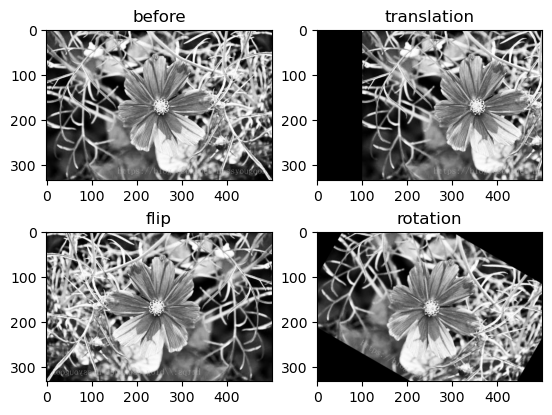

In [4]:
# 以使用opencv库函数为主
# 原图像
figure2 = plt.figure()
plt.subplot(221)
plt.title("before")
plt.imshow(srcImg, 'gray', vmin=0, vmax=255)

# 平移
delta_x = 100
delta_y = 0
# 需要注意此处变换矩阵数据类型必须为浮点型，否则会报错
warp_mat = np.float32([[1, 0, delta_x],
                       [0, 1, delta_y]])
# 此处建立的坐标系与前面相反，x轴正方向向右，y轴正方向向左，坐标系不符合右手定则，第三个参数要先输入矩阵的列(cols)作为x轴，再输入矩阵的行(rows)作为y轴
img11 = cv.warpAffine(srcImg, warp_mat, (cols, rows))
plt.subplot(222)
plt.title("translation")
plt.imshow(img11, 'gray', vmin=0, vmax=255)

# 镜像，第二个参数为flipCode，大于0表示水平翻转，等于0表示垂直翻转，小于0则同时进行两种翻转
img12 = cv.flip(srcImg, 1)
plt.subplot(223)
plt.title("flip")
plt.imshow(img12, 'gray', vmin=0, vmax=255)

# 旋转
center = (srcImg.shape[1]//2, srcImg.shape[0]//2)
angle = -30
scale = 1
rot_mat = cv.getRotationMatrix2D(center, angle, scale)
img13 = cv.warpAffine(srcImg, rot_mat, (cols, rows))
plt.subplot(224)
plt.title("rotation")
plt.imshow(img13, 'gray', vmin=0, vmax=255)


以下为bug记录,或者说是学习记录吧，主要还是由于对python的不熟悉，对于一些操作有些想当然

In [10]:
# 列表和数组作为数组索引的效果与元组不同
# 二元素元组作为索引时可以直接输出对应的元素，输出一个元素
# 二元素列表或数组组作为索引时，每个元素作为第一维的索引，输出两个行元素

a = np.array([[0, 1], [2, 3]])
for index, value in np.ndenumerate(a):
    # 实际上np.ndenumerate输出的index就是元组
    index1 = tuple(index)
    print('元组作索引', index1)
    print('索引到内容为\n', a[index1])

    index2 = list(index)
    print('列表作索引', index2)
    print('索引到内容为\n',a[index2])

    index3 = np.array(index)
    print('数组作索引', index3)
    print('索引到内容为\n',a[index3])


元组作索引 (0, 0)
索引到内容为
 0
列表作索引 [0, 0]
索引到内容为
 [[0 1]
 [0 1]]
数组作索引 [0 0]
索引到内容为
 [[0 1]
 [0 1]]
元组作索引 (0, 1)
索引到内容为
 1
列表作索引 [0, 1]
索引到内容为
 [[0 1]
 [2 3]]
数组作索引 [0 1]
索引到内容为
 [[0 1]
 [2 3]]
元组作索引 (1, 0)
索引到内容为
 2
列表作索引 [1, 0]
索引到内容为
 [[2 3]
 [0 1]]
数组作索引 [1 0]
索引到内容为
 [[2 3]
 [0 1]]
元组作索引 (1, 1)
索引到内容为
 3
列表作索引 [1, 1]
索引到内容为
 [[2 3]
 [2 3]]
数组作索引 [1 1]
索引到内容为
 [[2 3]
 [2 3]]


In [4]:
# 将二维数组转化为二维元组十分容易出错，需要正确的理解数据格式
a = np.array([[0, 1], [2, 3]])
print(a)
# 直接转化不是我们想要的结果，可以看出直接转化只是把最外层数组转化为元组
print('直接转化结果为', tuple(a))
# 使用np.nditer遍历输出的每个元素仍然是数组型数据，而不是数值型
print('元素遍历', tuple(e for e in np.nditer(a)))
# 使用tolist可以正确转化为二维列表，但直接转化为元组内层元素仍然为列表,而我们希望内层元素也为元组
print('tolist间接转化结果为', tuple(a.tolist()))
# 正确答案如下
result = tuple(tuple(row) for row in a)
print('正确答案', result)


[[0 1]
 [2 3]]
直接转化结果为 (array([0, 1]), array([2, 3]))
元素遍历 (array(0), array(1), array(2), array(3))
tolist间接转化结果为 ([0, 1], [2, 3])
正确答案 ((0, 1), (2, 3))
